In [1]:
import numpy as nm    
import matplotlib.pyplot as mtp
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import difflib

In [2]:
dataset = pd.read_csv('input.csv')
dataset = dataset.drop(['VegNovVeg'],axis=1)
dataset.head(90)

,Food_items,Breakfast,Lunch,Dinner,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
0,Asparagus Cooked,0,1,1,22,0.2,2.40,0.91,23.0,14,224.0,4.10,2.0,0,1.3
1,Avocados,1,0,0,160,15.0,2.00,0.55,12.0,7,485.0,8.50,6.7,0,0.7
2,Bananas,1,0,0,89,0.3,1.10,0.26,5.0,1,358.0,23.00,2.6,0,12.0
3,Bagels made in wheat,0,1,1,250,1.5,10.00,2.76,20.0,439,165.0,49.00,4.1,0,6.1
4,Berries,1,0,0,349,0.4,14.00,6.80,190.0,298,77.0,77.00,13.0,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Strawberry Icecream,0,0,1,192,8.4,3.20,0.21,120.0,60,188.0,28.00,0.9,0,0.0
86,Marshmallows,0,0,1,318,0.2,1.80,0.23,3.0,80,5.0,81.00,0.1,0,58.0
87,Chocolate milk,1,0,0,535,30.0,7.70,2.35,189.0,79,372.0,59.00,3.4,0,52.0
88,Rice Pudding,0,0,1,376,0.1,2.70,1.79,14.0,366,5.0,91.00,0.7,0,0.0


In [3]:
dataset = dataset.dropna()
dataset=dataset.reset_index(drop=True)

In [4]:
split = dataset.drop([	'Calories'	,'Fats',	'Proteins',	'Iron',	'Calcium',	'Sodium',	'Potassium',	'Carbohydrates',	'Fibre','VitaminD',	'Sugars'],axis=1)
breakfastFood = split[split['Breakfast']==1 ]
lunchFood = split[split['Lunch']==1 ]
dinnerFood= split[split['Dinner']==1 ]

In [5]:
breakfastFood=breakfastFood.drop(['Breakfast','Lunch','Dinner'],axis=1)
lunchFood=lunchFood.drop(['Breakfast','Lunch','Dinner'],axis=1)
dinnerFood=dinnerFood.drop(['Breakfast','Lunch','Dinner'],axis=1)

In [6]:
fooditemlist=dataset['Food_items']

In [7]:
x= dataset.iloc[:,[4,6]].values
x

array([[ 22.  ,   2.4 ],
       [160.  ,   2.  ],
       [ 89.  ,   1.1 ],
       ...,
       [295.  ,  12.9 ],
       [116.  ,  20.04],
       [214.  ,  13.78]])

In [8]:
nutrientData = dataset.iloc[:, 4:].values
nutrientData

array([[2.200e+01, 2.000e-01, 2.400e+00, ..., 2.000e+00, 0.000e+00,
        1.300e+00],
       [1.600e+02, 1.500e+01, 2.000e+00, ..., 6.700e+00, 0.000e+00,
        7.000e-01],
       [8.900e+01, 3.000e-01, 1.100e+00, ..., 2.600e+00, 0.000e+00,
        1.200e+01],
       ...,
       [2.950e+02, 1.600e+01, 1.290e+01, ..., 9.000e-01, 6.000e+00,
        1.160e+01],
       [1.160e+02, 3.300e+00, 2.004e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.140e+02, 8.100e+00, 1.378e+01, ..., 1.300e+00, 0.000e+00,
        0.000e+00]])

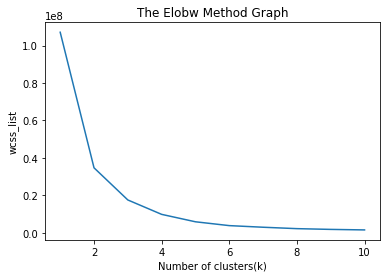

In [9]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [10]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

In [11]:
highCaloric=[]
midCaloric=[]
lowCaloric=[]

In [12]:
y_predict

array([0, 0, 0, ..., 2, 0, 2])

In [13]:
for i in range(len(y_predict)):
  if y_predict[i]==2:
    midCaloric.append(fooditemlist[i])
  if y_predict[i]==0:
    highCaloric.append(fooditemlist[i])
  if y_predict[i]==1:
    lowCaloric.append(fooditemlist[i])

In [14]:
#y_predict1= kmeans.fit(x)
#print(y_predict1.predict([[160	,2.0	]]))

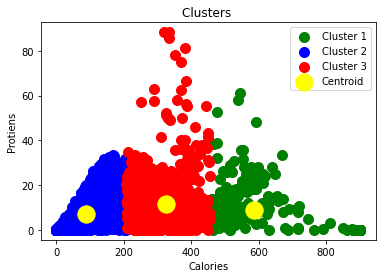

In [15]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 1') #for first cluster 
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 2') #for Second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters ')  
mtp.xlabel('Calories')  
mtp.ylabel('Protiens')  
mtp.legend()  
mtp.show()  

In [16]:
cosine_sim = linear_kernel(nutrientData,nutrientData)

In [17]:
cosine_sim[0]

array([ 51414.1281, 112591.4605,  82397.0366, ...,  58030.4546,
        64085.4294,  62050.012 ])

In [18]:
smd = dataset.iloc[:,[0,4,5,6,7,8,9,10,11,12,13,14]]
smd

,Food_items,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
0,Asparagus Cooked,22,0.2,2.40,0.91,23.0,14,224.0,4.10,2.0,0,1.3
1,Avocados,160,15.0,2.00,0.55,12.0,7,485.0,8.50,6.7,0,0.7
2,Bananas,89,0.3,1.10,0.26,5.0,1,358.0,23.00,2.6,0,12.0
3,Bagels made in wheat,250,1.5,10.00,2.76,20.0,439,165.0,49.00,4.1,0,6.1
4,Berries,349,0.4,14.00,6.80,190.0,298,77.0,77.00,13.0,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3125,"Rice, unenriched, raw, medium-grain, white",360,0.6,6.61,0.80,9.0,1,86.0,79.34,0.0,0,0.0
3126,"Pasta, cooked, spinach, fresh-refrigerated",130,0.9,5.06,1.11,18.0,6,37.0,25.04,0.0,0,0.0
3127,"Restaurant, general tso's chicken, Chinese",295,16.0,12.90,1.16,12.0,435,201.0,23.99,0.9,6,11.6
3128,"Chicken, raw, meat only, cornish game hens",116,3.3,20.04,0.74,12.0,68,269.0,0.00,0.0,0,0.0


In [19]:
titles = smd['Food_items']
indices = pd.Series(smd.index, index=smd['Food_items'])
indices

Food_items
Asparagus Cooked                                 0
Avocados                                         1
Bananas                                          2
Bagels made in wheat                             3
Berries                                          4
                                              ... 
Rice, unenriched, raw, medium-grain, white    3125
Pasta, cooked, spinach, fresh-refrigerated    3126
Restaurant, general tso's chicken, Chinese    3127
Chicken, raw, meat only, cornish game hens    3128
WENDY'S, Homestyle Chicken Fillet Sandwich    3129
Length: 3130, dtype: int64

In [20]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    print('sim_scores',sim_scores)
    food_items = [i[0] for i in sim_scores]
    print('food_items',food_items)
    return titles.iloc[food_items]

In [21]:
get_recommendations('Avocados').head(10)

sim_scores [(2923, 2982321.094), (1403, 2354168.5325), (833, 2227735.8320000004), (283, 2197120.2465), (2967, 1773581.2255), (1223, 1748198.9005), (3066, 1731348.2965), (340, 1706104.9024999999), (1297, 1668422.3390000002), (1686, 1591490.719)]
food_items [2923, 1403, 833, 283, 2967, 1223, 3066, 340, 1297, 1686]


2923    Beverages, powder, unsweetened, instant, tea
1403                          Spices, dried, chervil
833                    Spices, dried, coriander leaf
283                             Celery flakes, dried
2967     Beverages, powder, regular, instant, coffee
1223                       Radishes, dried, oriental
3066     Beverages, unsweetened, lemon, instant, tea
340                              Tomatoes, sun-dried
1297                        Spices, dried, dill weed
1686               Peppers, freeze-dried, red, sweet
Name: Food_items, dtype: object

In [22]:
rfcx=nutrientData
rfcy = fooditemlist

In [23]:
print(rfcx[0])

[2.20e+01 2.00e-01 2.40e+00 9.10e-01 2.30e+01 1.40e+01 2.24e+02 4.10e+00
 2.00e+00 0.00e+00 1.30e+00]


In [24]:
rfc= RandomForestClassifier(max_depth=25)
rfc.fit(rfcx,rfcy)

RandomForestClassifier(max_depth=25)

In [25]:
import pickle
pickle.dump(rfc,open('rfc.pkl','wb'))

In [ ]:
y_pred_test = rfc.predict(rfcx)
accuracy_score(rfcy, y_pred_test)

0.9253968253968254

In [ ]:
def Diff(list1,list2):
  sublist=[]
  for i in range(len(list1)):
    sublist.append(list1[i]-list2[i])
  return sublist

In [ ]:
from math import*
from decimal import Decimal
  
def nth_root(value, n_root):
 root_value = 1/float(n_root)
 return round (Decimal(value) ** Decimal(root_value),3)
  
def checkRequirement(x,y,p_value,init):
  remain = nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)
  initial = nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(init, y)),p_value)
  if(remain <= float(initial)*0.2):
    return True
  else:
    return False

In [ ]:
def getfooditems(initialItem,smd):
  predictItems=[]
  epoch=0
  remainbf = initialItem
  
  while(True):
    if(epoch==3):
      break
    if(checkRequirement(remainbf,[0,0,0,0,0,0,0,0,0,0,0],3,initialItem)):
      break
    bfpred = rfc.predict([remainbf])
    predictItems.append(bfpred)
    yo = smd['Food_items'].values ==bfpred
    n = smd[yo] 
    print('N1',n)
    n=n.values.tolist()
    n=n[0][1:]
    print('N2',n)
    remainbf = Diff(remainbf,n)
    epoch=epoch+1
  return(predictItems)


In [ ]:
required = [2500,	170	,160.00	,25	,27.0	,950	,280.0,	125.00	,12.1,	0,	14.1]

In [ ]:
breakfastCalRequirment = [x * 0.2 for x in required]
lunchCalRequirment = [x * 0.30 for x in required]
dinnerCalRequirment = [x * 0.50 for x in required]

In [ ]:
#print('For BreakFast')
breakfastrecom = getfooditems(breakfastCalRequirment,smd)
#print('For lUNCH')
lunchrecom = getfooditems(lunchCalRequirment,smd)
#print('For Dinner')
dinnerrecom = getfooditems(dinnerCalRequirment,smd)




N1                    Food_items  Calories  Fats  ...  Fibre  VitaminD  Sugars
1376  Cheese, hard type, goat       452  36.0  ...    0.0        26    2.17

[1 rows x 12 columns]
N2 [452, 36.0, 30.52, 1.88, 895.0, 423, 48.0, 2.17, 0.0, 26, 2.17]
N1                                Food_items  Calories  ...  VitaminD  Sugars
2753  Gravy, fat free, turkey, CAMPBELL'S        33  ...         0     0.0

[1 rows x 12 columns]
N2 [33, 0.0, 1.67, 0.0, 0.0, 0, 0.0, 6.67, 0.0, 0, 0.0]
N1                                   Food_items  Calories  ...  VitaminD  Sugars
2435  Beverages, Kiwi Strawberry Juice Drink        47  ...         0   11.63

[1 rows x 12 columns]
N2 [47, 0.0, 0.0, 0.15, 0.0, 11, 14.0, 12.26, 0.0, 0, 11.63]
N1                     Food_items  Calories  Fats  ...  Fibre  VitaminD  Sugars
1319  Seeds, hulled, hemp seed       553  49.0  ...    4.0         0     1.5

[1 rows x 12 columns]
N2 [553, 49.0, 31.56, 7.95, 70.0, 5, 1200.0, 8.67, 4.0, 0, 1.5]
N1                             Food_

In [ ]:
print(required)
print('######Breakfast#######')
for i in breakfastrecom:
  print(i[0])
  print('##########More#####')
  print(get_recommendations(i[0])[0:2])
print('######Lunch#######')
for i in lunchrecom:
  print(i[0])
  print('##########More#####')
  print(get_recommendations(i[0])[0:2])
print('######Dinner#######')
for i in dinnerrecom:
  print(i[0])
  print('##########More#####')
  print(get_recommendations(i[0])[0:2])

[2500, 170, 160.0, 25, 27.0, 950, 280.0, 125.0, 12.1, 0, 14.1]
######Breakfast#######
Cheese, hard type, goat
##########More#####
sim_scores [(2350, 14412259.377600001), (861, 11573280.0), (1982, 10430167.3026), (2573, 10403097.1525), (953, 10302626.612100001), (389, 5182638.9213), (3027, 4443988.5846), (1295, 4117298.5276), (176, 3692534.7320000003), (938, 3497915.5485)]
food_items [2350, 861, 1982, 2573, 953, 389, 3027, 1295, 176, 938]
2350    Desserts, unsweetened, tablets, rennin
861              Leavening agents, baking soda
Name: Food_items, dtype: object
Gravy, fat free, turkey, CAMPBELL'S
##########More#####
sim_scores [(382, 29766.0), (407, 29766.0), (444, 29766.0), (445, 29766.0), (511, 29766.0), (519, 29766.0), (765, 29766.0), (2342, 29766.0), (699, 29700.0), (710, 29700.0)]
food_items [382, 407, 444, 445, 511, 519, 765, 2342, 699, 710]
382    Fish oil, menhaden
407    Fat, mutton tallow
Name: Food_items, dtype: object
Beverages, Kiwi Strawberry Juice Drink
##########More###